In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measurment = Base.classes.measurement
Station = Base.classes.station


In [21]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date =  session.query(Measurment.date).order_by(Measurment.date.desc()).first().date
f'The most recent date is : {recent_date}'

'The most recent date is : 2017-08-23'

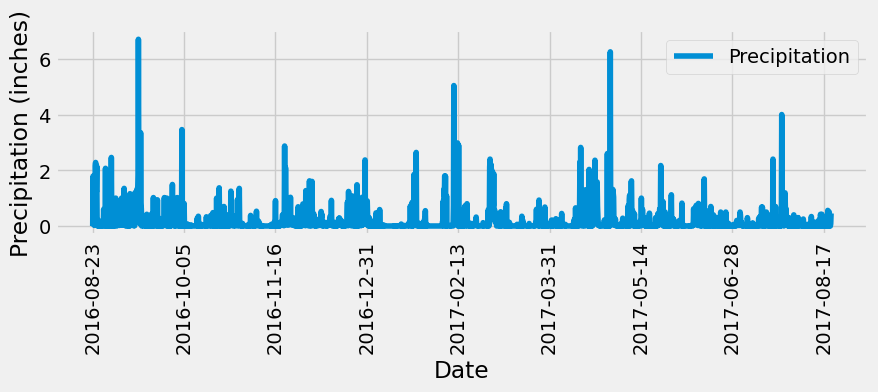

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_oneyearago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
f'The date one year ago : {date_oneyearago}'


# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurment.date, Measurment.prcp).filter(Measurment.date >= date_oneyearago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=["Date", "Precipitation"])
prcp_df

# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values("Date")
sorted_prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
date_indexed_df = sorted_prcp_df.set_index("Date")
date_indexed_df.head() 
clean_prcp_df = date_indexed_df.dropna(axis=0, how="any")
clean_prcp_df
clean_prcp_df.plot(figsize=(9,4), rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show() 




In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_prcp_df.describe() 

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station).count()
f"Total Stations : {total_station}" 

'Total Stations : 9'

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurment.station, func.count(Measurment.station)).\
                    order_by(func.count(Measurment.station).desc()).\
                    group_by(Measurment.station).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# The most active station 
most_active_station = active_station[0][0]
f"The most active station : {most_active_station}"

'The most active station : USC00519281'

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurment.tobs)).filter(Measurment.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurment.tobs)).filter(Measurment.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurment.tobs)).filter(Measurment.station == most_active_station).scalar()
print(f"The most active station : {most_active_station}")
print(f"Low Temp : {lowest_temp}")
print(f"High Temp : {highest_temp}")
print(f"Avg Temp : {round(average_temp, 2)}")

The most active station : USC00519281
Low Temp : 54.0
High Temp : 85.0
Avg Temp : 71.66


In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = pd.DataFrame(session.query(Measurment.tobs).filter((Measurment.station == most_active_station) 
                                                                      & (Measurment.date >= date_oneyearago)).all())
most_active_tobs.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


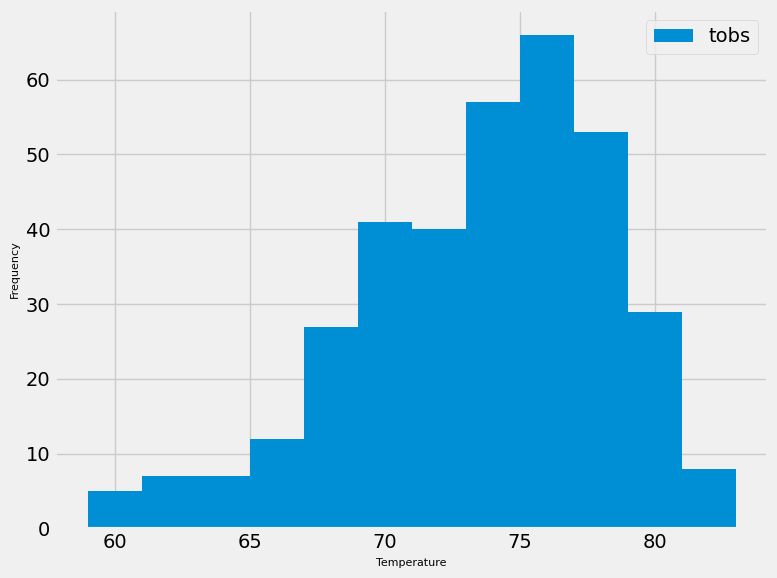

In [35]:
most_active_tobs.plot(kind="hist", figsize=(8,6), bins=12, legend=True)
plt.xlabel("Temperature", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.tight_layout()
plt.show()

# Close session

In [36]:
# Close Session
session.close()